In [1]:
# from utils import (
#     train_regression_model,
#     evaluate_model,
#     load_simulated_regression_data,
# )
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
# from irf.ensemble import wrf_reg as rfr
# from irf.tree import WeightedDecisionTreeRegressor as wtr
import pickle as pk
from multiprocessing import Pool
from helper import ff, ff_3

In [2]:
final_results = {}
recorded = {}
data = {}
p = Pool(16)
# def ff(ind):
#     final1 = {}
#     final2 = {}
#     X, y, y_true = load_simulated_regression_data(i=ind,SNR=SNR, num_interact=num_interact, order=order, n=20, p = 17)
#     for feature_selection in ['soft', 'hard']:
#         y_pred = train_regression_model(X, y, feature_selection=feature_selection, intended_order=order, threshold=0, n_jobs=1)
#         for metric in ['strict', 'mild']:
#             result = evaluate_model(y_pred, y_true, name, metric=metric, with_sign=True)
#             final1[(name, num_interact, order, SNR, ind, feature_selection, metric)] = result
#             final2[(name, num_interact, order, SNR, ind, feature_selection, metric)] = [X, y, y_true, y_pred]
#     return final1, final2
for name in ["Sim_reg"]:
    for num_interact in range(1, 5):
        for order in range(2, 5):
            for SNR in [1, 10, 50, 100]:
                pooled_results = p.starmap(ff, [(name, num_interact, order, SNR, ind) for ind in range(40)])
                for ind in range(40):
                    final_results = {**final_results, **pooled_results[ind][0]}
                    recorded = {**recorded, **pooled_results[ind][1]}
                print(num_interact, order)
                with open("temporary_save.pk", 'wb') as f:
                    pk.dump(final_results, f)
                    pk.dump(recorded, f)

1 2
1 2
1 2
1 3
1 3
1 3
1 3
1 4
1 4
1 4
1 4
2 2
2 2
2 2
2 2
2 3
2 3
2 3
2 3
2 4
2 4
2 4
2 4
3 2
3 2
3 2
3 2
3 3
3 3
3 3
3 3
3 4
3 4
3 4
3 4
4 2
4 2
4 2
4 2
4 3
4 3
4 3
4 3
4 4
4 4
4 4
4 4


In [ ]:
### final_results = {}
recorded = {}
data = {}
feature_correlation = 0
overlap = 0
noise_type = 'Gaussian'
for name in ["Sim_reg"]:
    for num_interact in range(1, 5):
        for order in range(2, 5):
            for SNR in [1, 10, 50, 100]:
                for ind in tqdm(range(40)):
                    results, tmp_recorded = ff_3(name, num_interact, order, SNR, feature_correlation, overlap, noise_type, ind) # ff_3 uses iRF to get the results
                    final_results = {**final_results, **results}
                    recorded = {**recorded, **tmp_recorded}
                print(num_interact, order)
                with open("08_iRF.pk", 'wb') as f:
                    pk.dump(final_results, f)
                    pk.dump(recorded, f)

In [ ]:
for feature_correlation in [0, 0.2, 0.4, 0.6]:
    pooled_results = p.starmap(ff_2, [(name, num_interact, order, SNR, feature_correlation, 0, 'Gaussian', ind) for ind in range(40)])
    for ind in range(40):
        final_results = {**final_results, **pooled_results[ind][0]}
        recorded = {**recorded, **pooled_results[ind][1]}
    print(feature_correlation)
    with open("082_save_correlated_2_3.pk", 'wb') as f:
        pk.dump(final_results, f)
        pk.dump(recorded, f)

In [2]:
p = Pool(8)

Process ForkPoolWorker-1:
Process ForkPoolWorker-7:
Process ForkPoolWorker-8:
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Process ForkPoolWorker-5:
Process ForkPoolWorker-2:
Process ForkPoolWorker-6:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "

In [3]:
### final_results = {}
recorded = {}
final_results = {}
feature_correlation = 0
overlap = 0
order = 3
noise_type = 'Gaussian'
name = "Sim_reg"
for num_interact in range(3, 4):
    print(f"num_interact = {num_interact}")
    SNR = 50 if num_interact == 2 else 100
    for overlap in [0, 1, 2]:
        print(f"overlap = {overlap}")
        pooled_results = p.starmap(ff_3, [(name, num_interact, order, SNR, feature_correlation, overlap, noise_type, ind) for ind in range(40)])
        for ind in range(40):
            final_results = {**final_results, **pooled_results[ind][0]}
            recorded = {**recorded, **pooled_results[ind][1]}
    print("overlap")
    overlap = 0
    for feature_correlation in [0, 0.2, 0.4, 0.6]:
        pooled_results = p.starmap(ff_3, [(name, num_interact, order, SNR, feature_correlation, overlap, noise_type, ind) for ind in range(40)])
        for ind in range(40):
            final_results = {**final_results, **pooled_results[ind][0]}
            recorded = {**recorded, **pooled_results[ind][1]}
    print(feature_correlation)
    feature_correlation = 0
    for noise_type in ['Gaussian', 'Laplacian', 'Cauchy']:
        pooled_results = p.starmap(ff_3, [(name, num_interact, order, SNR, feature_correlation, overlap, noise_type, ind) for ind in range(40)])
        for ind in range(40):
            final_results = {**final_results, **pooled_results[ind][0]}
            recorded = {**recorded, **pooled_results[ind][1]}
    break
with open("08_iRF_perturb_3.pk", 'wb') as f:
    pk.dump(final_results, f)
    pk.dump(recorded, f)

num_interact = 3
overlap = 0
overlap = 1
overlap = 2
overlap
0.6


In [5]:
larger = set(final_results.keys())

In [6]:
smaller = set(final_results.keys())

In [39]:
for key in larger - smaller:
    final_results.pop(key, None)

In [38]:
with open("08_iRF_perturb.pk", 'rb') as f:
    final_results = pk.load(f)
    recorded = pk.load(f)

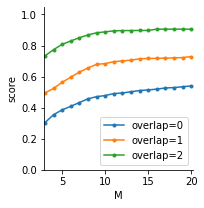

In [7]:
fig, ax = plt.subplots( figsize=(8/3,3))
for j, overlap in enumerate(range(0, 3)):
    # depth weighted 
    min_length = 20
    scores = []
    for x, v in final_results.items():
        if x[0] == 0 and x[1] == overlap and x[2] == 'Gaussian' and x[4] == 'soft' and x[5] == 'mild':
            if len(v) < min_length:
                v = list(v) + [v[-1]] * (min_length - len(v))
            scores.append(v[:min_length])
    scores = np.array(scores)
    ax.errorbar(
        np.arange(1, min_length+1),
        np.nanmean(scores, axis=0),
        marker='.',
    )
    
ax.set_ylim([0,1.05])
ax.set_xlim([2.9, 20.2])
ax.legend(['overlap=0', 'overlap=1', 'overlap=2'])
#ax.set_title(f"Number of interactions {num_interact} with order {order}", fontsize=10)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.set_ylabel(f"score")
ax.set_xlabel("M")
#ax.set_title(f"interaction-order = {order}")
# plt.tight_layout()
plt.show()

In [14]:
recorded[(0, 0, 'Gaussian', 0, 'soft', 'mild')][3]

[[(5, 'L')],
 [(6, 'L'), (7, 'L')],
 [(2, 'L')],
 [(5, 'L'), (8, 'L')],
 [(1, 'L')],
 [(0, 'L'), (4, 'L')],
 [(4, 'L')],
 [(5, 'L'), (7, 'L'), (24, 'L'), (47, 'L')],
 [(0, 'L'), (3, 'L'), (5, 'L'), (10, 'L'), (18, 'L'), (25, 'L')],
 [(25, 'L')],
 [(1, 'L'), (5, 'L'), (6, 'L'), (7, 'L'), (15, 'L'), (44, 'L')],
 [(5, 'L'), (6, 'L'), (7, 'L')],
 [(2, 'L'), (3, 'L'), (8, 'L'), (22, 'L'), (24, 'L'), (39, 'L'), (42, 'L')],
 [(3, 'L'), (8, 'L')],
 [(3, 'L'), (42, 'L')],
 [(0, 'L'),
  (1, 'L'),
  (4, 'L'),
  (5, 'L'),
  (6, 'L'),
  (7, 'L'),
  (16, 'L'),
  (35, 'L'),
  (36, 'L'),
  (38, 'L')],
 [(0, 'L'), (1, 'L'), (4, 'L'), (5, 'L')],
 [(1, 'L'), (4, 'L'), (6, 'L'), (7, 'L')],
 [(4, 'L'), (5, 'L'), (22, 'L'), (25, 'L'), (37, 'L')],
 [(0, 'L'), (4, 'L'), (7, 'L'), (38, 'L'), (48, 'L')],
 [(0, 'L'), (7, 'L')],
 [(0, 'L'),
  (4, 'L'),
  (6, 'L'),
  (7, 'L'),
  (9, 'L'),
  (16, 'L'),
  (33, 'L'),
  (42, 'L'),
  (48, 'L')],
 [(7, 'L'), (48, 'L')],
 [(2, 'L'), (3, 'L'), (5, 'L'), (8, 'L'), (13, 'L'

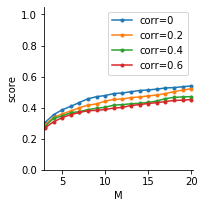

In [8]:
fig, ax = plt.subplots(figsize=(8/3,3))
for j, corr in enumerate([0, 0.2, 0.4, 0.6]):
    # depth weighted 
    min_length = np.min([len(v) for x, v in final_results.items() if x[0] == corr and x[1] == 0 and x[2] == 'Gaussian' and x[4] == 'soft' and x[5] == 'mild'])
    min_length = min(20, min_length)
    min_length = 20
    scores = []
    for x, v in final_results.items():
        if x[0] == corr and x[1] == 0 and x[2] == 'Gaussian' and x[4] == 'soft' and x[5] == 'mild':
            if len(v) < min_length:
                v = list(v) + [v[-1]] * (min_length - len(v))
            scores.append(v[:min_length])
    scores = np.array(scores)
    ax.errorbar(
        np.arange(1, min_length+1),
        np.nanmean(scores, axis=0),
        marker='.',
    )

ax.set_ylim([0,1.05])
ax.set_xlim([2.9, 20.2])
ax.legend(['corr=0', 'corr=0.2', 'corr=0.4', 'corr=0.6'])
#ax.set_title(f"Number of interactions {num_interact} with order {order}", fontsize=10)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.set_ylabel(f"score")
ax.set_xlabel("M")
#ax.set_title(f"interaction-order = {order}")
# plt.tight_layout()
plt.show()

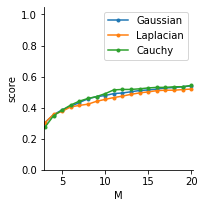

In [9]:
fig, ax = plt.subplots(figsize=(8/3.,3))
for j, noise in enumerate(["Gaussian", "Laplacian", "Cauchy"]):
    # depth weighted 
    min_length = np.min([len(v) for x, v in final_results.items() if x[0] == 0 and x[1] == 0 and x[2] == noise and x[4] == 'soft' and x[5] == 'mild'])
    min_length = min(20, min_length)
    min_length = 20
    scores = []
    for x, v in final_results.items():
        if x[0] == 0 and x[1] == 0 and x[2] == noise and x[4] == 'soft' and x[5] == 'mild':
            if len(v) < min_length:
                v = list(v) + [v[-1]] * (min_length - len(v))
            scores.append(v[:min_length])
    scores = np.array(scores)
    ax.errorbar(
        np.arange(1, min_length+1),
        np.nanmean(scores, axis=0),
        marker='.',
    )

ax.set_ylim([0,1.05])
ax.set_xlim([2.9, 20.2])
ax.legend(['Gaussian', 'Laplacian', 'Cauchy'])
#ax.set_title(f"Number of interactions {num_interact} with order {order}", fontsize=10)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.set_ylabel(f"score")
ax.set_xlabel("M")
#ax.set_title(f"interaction-order = {order}")
# plt.tight_layout()
plt.show()